(160, 320, 3)


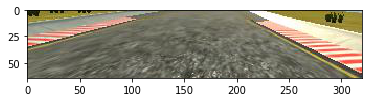

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

center_image = mpimg.imread('examples/center_normal.jpg')
center_recovery = mpimg.imread('examples/center_recovery.jpg')

print(center_image.shape)

crop_center = center_image[70:135, :, :]
crop_recovery = center_recovery[70:135, :, :]

plt.imshow(crop_center)

flip_center = cv2.flip(center_image, 1)
flip_recovery = cv2.flip(center_recovery, 1)


plt.imsave('./examples/crop_center.jpg', crop_center)
plt.imsave('./examples/crop_recovery.jpg', crop_recovery)
plt.imsave('./examples/flip_center.jpg', flip_center)
plt.imsave('./examples/flip_recovery.jpg', flip_recovery)


In [13]:
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout, Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D
from keras.utils.vis_utils import plot_model


Using TensorFlow backend.
/home/allen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/allen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/allen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/allen/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [15]:
# Build the model
keep_prob = 0.8
epochs = 3

model = Sequential()

# Normalize
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160, 320, 3)))

# Crop ROI
model.add(Cropping2D(cropping=((70, 25), (0, 0))))

# Convolutional layers
model.add(Conv2D(24, (5, 5), activation="relu", strides=(2, 2)))
model.add(Conv2D(36, (5, 5), activation="relu", strides=(2, 2)))
model.add(Conv2D(48, (5, 5), activation="relu", strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))

model.add(Dropout(keep_prob))

model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

print(model.summary())

W0806 02:01:24.365218 139755635922752 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_2 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 37, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 35, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 33, 64)         36928     
__________

In [9]:
history_default = {
    'loss': [0.006512041758334041, 0.0008311516339790444, 0.0005272144547977347, 0.00038557148968919075, 0.00030941541123253295],
    'val_loss': [0.017371318235392192, 0.016882253670903284, 0.01657839318524942, 0.016254860592942514, 0.016368645320405956]
}

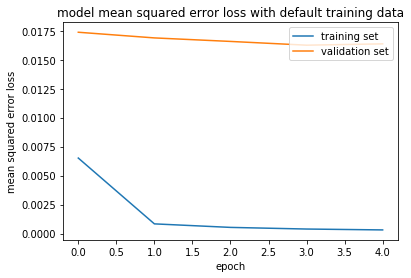

In [10]:
plt.plot(history_default['loss'])
plt.plot(history_default['val_loss'])
plt.title('model mean squared error loss with default training data')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [11]:
history_new = {
    'loss': [0.0034302260096332818, 0.000542930150600661, 0.000421053421729288],
    'val_loss': [0.021586671560198934, 0.020236517079634968, 0.01970489034569644]
}

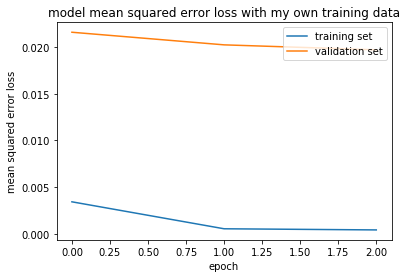

In [12]:
plt.plot(history_new['loss'])
plt.plot(history_new['val_loss'])
plt.title('model mean squared error loss with my own training data')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()